# Chapter 8: Advanced Data Analysis
In the last few chapters, we have become comfortable with the idea of building our own functions. These can become quite complex, as we have learned with the construction of the OLS regression in chapter 7. We will continue developing our tool set for working with and managing large sets of data by integrating data from different data sets. We will introduce the multi index to facilitate this process. Among other things, the multi index is useful for including identifiers across time and region or principality. We will also use the multi index to perform a panel regression that controls for level effects between different countries.

## Using a Double Index to Work with Panel Data
In any project, it will not be uncommon for data to be attached to more than one indentifying category. Often, data will be labeled by polity and by date. In the next several examples, we will work with multiple data sets of this sort, working to combine different data sets, investigate the features of the double index, and use this data in a panel regression that can control for effects by polity and by time period.

### Plotting with Double Index
We will be working with two datasets in the next example: the [Fraser Economic Freedom Index](https://www.fraserinstitute.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=2&max-year=0&filter=0&year=2017) and GDP from the [Maddison Project](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2018).

Due to the formatting of the Fraser Economic Freedom Index, the first column and the first three rows of data in the sheet titled “EFW Index 2018 Report” are blank. We will account for this when importing the data with pandas. Both should be saved in the same folder as the script below.

First, import the GDP data from Maddison Project:

#### Fraser Economics data can give us the data for all the years. 
We also have time series panel data from the Madison project which is a estimateds of global lvel of income. They have it by country, and then 
sum it by estimate of the global level of income, all the way back to zero AD. 


#### First, let us import GOP data. 

In [31]:
#multiIndex.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# index_col = [0,2] will select  countrycode as the primary index and year as the secondary index
# panel dataset is easier to manage using multiple inddex
data = pd.read_excel("mpd2018 (2).xlsx",
                    sheet_name = "Full data",
                    index_col = [0, 2])
data

country  cgdppc  rgdpnapc      pop
countrycode year                                        
AFG         1820  Afghanistan     NaN       NaN   3280.0
            1870  Afghanistan     NaN       NaN   4207.0
            1913  Afghanistan     NaN       NaN   5730.0
            1950  Afghanistan  2392.0    2392.0   8150.0
            1951  Afghanistan  2422.0    2422.0   8284.0
...                       ...     ...       ...      ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0
            2013     Zimbabwe  1801.0    1604.0  13183.0
            2014     Zimbabwe  1797.0    1594.0  13772.0
            2015     Zimbabwe  1759.0    1560.0  14230.0
            2016     Zimbabwe  1729.0    1534.0  14547.0

[19873 rows x 4 columns]

We choose the countrycode as an index variable instead of choosing the country name.This is because it is easier to sort it out using the code.Country code is standardized and allow us to merge out data frame.We are going to take the GDP data and merge that dataframe with the economicfreedom data just like we merge the Geodata and the Covid data on the unemployment rate. 

Really important thing we need to know is to take different datasets and find a way to align them, that is what the country code is going to do for us. 

When working with a multi index, calling the values from a single index requires a few steps. If you were to call data.index in the console, both the countrycode and the year values would be returned:

In [2]:
data.index

MultiIndex([('AFG', 1820),
            ('AFG', 1870),
            ('AFG', 1913),
            ('AFG', 1950),
            ('AFG', 1951),
            ('AFG', 1952),
            ('AFG', 1953),
            ('AFG', 1954),
            ('AFG', 1955),
            ('AFG', 1956),
            ...
            ('ZWE', 2007),
            ('ZWE', 2008),
            ('ZWE', 2009),
            ('ZWE', 2010),
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016)],
           names=['countrycode', 'year'], length=19873)

In [3]:
data.index.get_level_values("year")

Int64Index([1820, 1870, 1913, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=19873)

In [4]:
# make a list 
countries = data.groupby("countrycode").mean().index
countries

Index(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI',
       ...
       'URY', 'USA', 'UZB', 'VEN', 'VNM', 'YEM', 'YUG', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='countrycode', length=169)

In [5]:
years = data.groupby("year").mean().index
years

Int64Index([   1,  730, 1000, 1150, 1280, 1281, 1282, 1283, 1284, 1285,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=741)

In [6]:
data.groupby("year").mean().index

Int64Index([   1,  730, 1000, 1150, 1280, 1281, 1282, 1283, 1284, 1285,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=741)

In [7]:
data.groupby("year").mean().shift()

,cgdppc,rgdpnapc,pop
year,,,
1,NaN,NaN,NaN
730,1175.214286,1175.214286,4685.348837
1000,972.333333,1173.666667,NaN
1150,969.500000,1114.250000,4775.957447
1280,963.750000,994.750000,NaN
...,...,...,...
2012,17396.071006,17396.071006,42849.994083
2013,17810.887574,17671.449704,43315.721893
2014,17878.443787,17792.828402,43788.609467


In [8]:
data.groupby('countrycode').mean()

,cgdppc,rgdpnapc,pop
countrycode,,,
AFG,2042.626866,2042.626866,16274.685714
AGO,3572.738095,5097.500000,8439.746269
ALB,4107.191781,4351.205479,1889.220183
ARE,83268.875000,97724.291667,2316.283582
ARG,9022.068027,9191.326531,20976.983471
...,...,...,...
YEM,2325.417910,3061.283582,12267.057143
YUG,4755.073684,7036.452632,17728.378641
ZAF,4023.770909,4571.992727,29526.453333


In [9]:
data.groupby('year').mean()

,cgdppc,rgdpnapc,pop
year,,,
1,1175.214286,1175.214286,4685.348837
730,972.333333,1173.666667,NaN
1000,969.500000,1114.250000,4775.957447
1150,963.750000,994.750000,NaN
1280,914.333333,1122.000000,NaN
...,...,...,...
2012,17810.887574,17671.449704,43315.721893
2013,17878.443787,17792.828402,43788.609467
2014,17981.846154,18036.846154,44264.011834


In [10]:
# take the difference from the previous year to get the change in absolute number
data.groupby("country").diff()

cgdppc  rgdpnapc     pop
countrycode year                          
AFG         1820     NaN       NaN     NaN
            1870     NaN       NaN   927.0
            1913     NaN       NaN  1523.0
            1950     NaN       NaN  2420.0
            1951    30.0      30.0   134.0
...                  ...       ...     ...
ZWE         2012   108.0      89.0   536.0
            2013   178.0       0.0   563.0
            2014    -4.0     -10.0   589.0
            2015   -38.0     -34.0   458.0
            2016   -30.0     -26.0   317.0

[19873 rows x 3 columns]

In [11]:
# data.groupby("countrycode").diff()
# Check column datatypes 
data.dtypes

country      object
cgdppc      float64
rgdpnapc    float64
pop         float64
dtype: object

In [12]:
#data.loc[['countrycode','year','cgdppc','rgdpnapc']]
# data.iloc[0]
# data.loc[1:2, ['country', 'cgdppc']] 

we start to work on plotting the data and plotting pairs of countries. 
we create a dictionary  for each pair of countries and use real GDP per capita to compare.

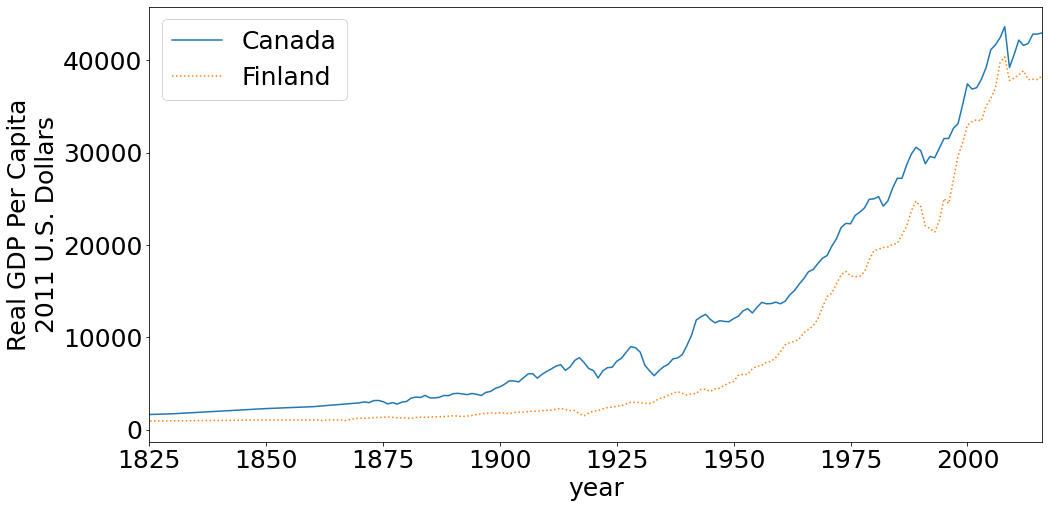

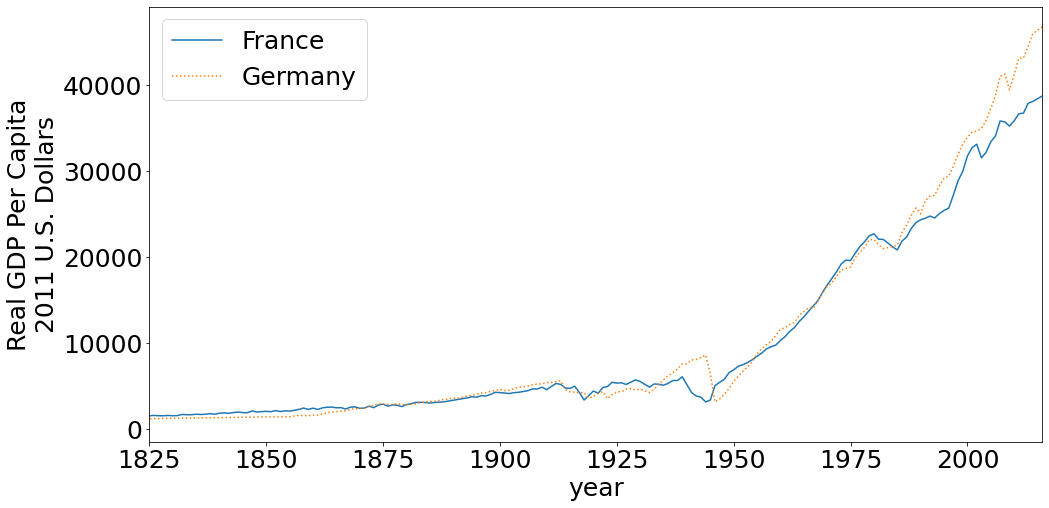

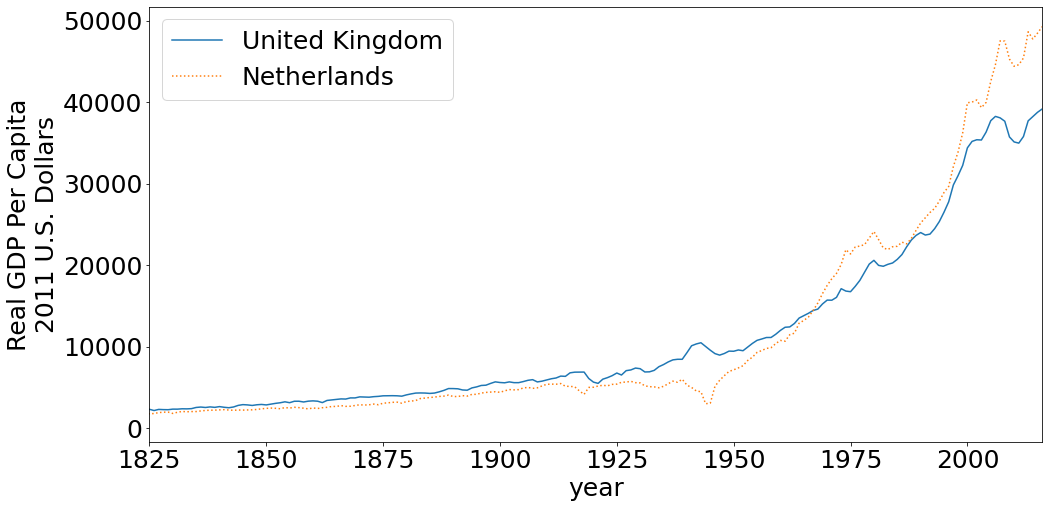

In [13]:
#multiIndex.py
# . . .
# pairs of countries to compare in plots
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("GBR", "NLD")]
linestyles = ["-", ":"] # when we plot, use different line styles
# Using a for loop, we use one of these at a time with a matching linestyle.

plt.rcParams.update({"font.size": 25})
for pair in pairs:
    fig, ax = plt.subplots(figsize= (16, 8))
    for i in range(len(pair)):
        country_code = pair[i]
        # gather country name associated with country_code
        country_name = data.loc[country_code,2000]["country"]
        linestyle = linestyles[i]
        # plot country, and all dataes (:)
        data.loc[country_code, :]["cgdppc"].dropna(
            ).plot.line(ax = ax, label = country_name,
                       linestyle = linestyle)
    plt.xlim([1825, max(years)])
    plt.ylabel("Real GDP Per Capita\n2011 U.S. Dollars")
    plt.legend()
    plt.show()
    plt.close()

In [14]:
# Lean how to merge datasets with double index
#dataForPanel.py
import pandas as pd

# make sure dates are imported in the same format; to do this, we turn off parse dates
fraser_data = pd.read_excel(
    "efw-2019-master-index-data-for-researchers.xlsx",
    sheet_name = "EFW Panel Data 2019 Report",
    header = [2],  index_col = [2,1], parse_dates = False)
fraser_data = fraser_data.dropna(
    axis = 0, thresh = 1).dropna(axis = 1, thresh = 1)
fraser_data

Countries       EFW  1  Size of Government  \
ISO_Code Year                                              
ALB      2017   Albania  7.673511               7.528167   
         2016   Albania  7.637742               7.875862   
         2015   Albania  7.639666               7.904257   
         2014   Albania  7.586769               7.882037   
         2013   Albania  7.389525               7.807904   
...                 ...       ...                    ...   
ZWE      1990  Zimbabwe  4.516140               5.108843   
         1985  Zimbabwe  4.226841               5.026250   
         1980  Zimbabwe  4.054740               6.322625   
         1975  Zimbabwe       NaN                    NaN   
         1970  Zimbabwe       NaN                    NaN   

               2  Legal System & Property Rights  3  Sound Money  \
ISO_Code Year                                                      
ALB      2017                           5.064907        9.648271   
         2016                           5.071814        9.553657   
         2015                           5.003489        9.585625   
         2014                           4.666740        9.629320   
         2013                           4.543782        9.690942   
...                                          ...             ...   
ZWE      1990                           3.439437        5.664840   
         1985                           2.633492        6.305850   
         1980                           1.379602        6.343342   
         1975                                NaN             NaN   
         1970                                NaN             NaN   

               4  Freedom to trade internationally  5  Regulation  
ISO_Code Year                                                      
ALB      2017                             8.343863       7.782349  
         2016                             8.214900       7.472476  
         2015                             8.109118       7.595838  
         2014                             8.208630       7.547119  
         2013                             7.705771       7.199224  
...                                            ...            ...  
ZWE      1990                             4.689623       3.953668  
         1985                             3.161743       4.207229  
         1980                             3.277015       3.280637  
         1975                                  NaN            NaN  
         1970                                  NaN            NaN  

[3888 rows x 7 columns]

In [15]:
maddison_data = data
fraser_data["RGDP Per Capita"] = maddison_data["cgdppc"]
fraser_data

Countries       EFW  1  Size of Government  \
ISO_Code Year                                              
ALB      2017   Albania  7.673511               7.528167   
         2016   Albania  7.637742               7.875862   
         2015   Albania  7.639666               7.904257   
         2014   Albania  7.586769               7.882037   
         2013   Albania  7.389525               7.807904   
...                 ...       ...                    ...   
ZWE      1990  Zimbabwe  4.516140               5.108843   
         1985  Zimbabwe  4.226841               5.026250   
         1980  Zimbabwe  4.054740               6.322625   
         1975  Zimbabwe       NaN                    NaN   
         1970  Zimbabwe       NaN                    NaN   

               2  Legal System & Property Rights  3  Sound Money  \
ISO_Code Year                                                      
ALB      2017                           5.064907        9.648271   
         2016                           5.071814        9.553657   
         2015                           5.003489        9.585625   
         2014                           4.666740        9.629320   
         2013                           4.543782        9.690942   
...                                          ...             ...   
ZWE      1990                           3.439437        5.664840   
         1985                           2.633492        6.305850   
         1980                           1.379602        6.343342   
         1975                                NaN             NaN   
         1970                                NaN             NaN   

               4  Freedom to trade internationally  5  Regulation  \
ISO_Code Year                                                       
ALB      2017                             8.343863       7.782349   
         2016                             8.214900       7.472476   
         2015                             8.109118       7.595838   
         2014                             8.208630       7.547119   
         2013                             7.705771       7.199224   
...                                            ...            ...   
ZWE      1990                             4.689623       3.953668   
         1985                             3.161743       4.207229   
         1980                             3.277015       3.280637   
         1975                                  NaN            NaN   
         1970                                  NaN            NaN   

               RGDP Per Capita  
ISO_Code Year                   
ALB      2017              NaN  
         2016          11285.0  
         2015          10947.0  
         2014          10703.0  
         2013          10138.0  
...                        ...  
ZWE      1990           3265.0  
         1985           3615.0  
         1980           4003.0  
         1975           4142.0  
         1970           3448.0  

[3888 rows x 8 columns]

In [16]:
fraser_data.to_excel("fraserDataWithRGDPPC.xls")

In [ ]:
# learn how to create indicator. 

In [17]:
#indicatorVariable.py
def create_indicator_variable(data, indicator_name,
                              index_name, target_index_list):
    data[indicator_name] = 0
    # for each index whose name matches an entry in 
    # target_index_list a value of 1 will be recorded
    for index in target_index_list:
        data.loc[data.index.get_level_values(
            index_name) == index, [indicator_name]] = 1 
        
data = pd.read_excel("fraserDataWithRGDPPC.xls",
                  index_col = [0,1],
                  parse_dates = True)

# select "ISO_Code" from names of double index
index_name = data.index.names[0]
indicator_name = "North America"

# select ISO_codes that will be marked 1 since they are
# in north america
countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  
        
create_indicator_variable(data = data,
                indicator_name = indicator_name,
                index_name = index_name,
                target_index_list = countries_in_north_america)
        
        
        
data

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                    
ALB      2017-01-01   Albania  7.673511               7.528167   
         2016-01-01   Albania  7.637742               7.875862   
         2015-01-01   Albania  7.639666               7.904257   
         2014-01-01   Albania  7.586769               7.882037   
         2013-01-01   Albania  7.389525               7.807904   
...                       ...       ...                    ...   
ZWE      1990-01-01  Zimbabwe  4.516140               5.108843   
         1985-01-01  Zimbabwe  4.226841               5.026250   
         1980-01-01  Zimbabwe  4.054740               6.322625   
         1975-01-01  Zimbabwe       NaN                    NaN   
         1970-01-01  Zimbabwe       NaN                    NaN   

                     2  Legal System & Property Rights  3  Sound Money  \
ISO_Code Year                                                            
ALB      2017-01-01                           5.064907        9.648271   
         2016-01-01                           5.071814        9.553657   
         2015-01-01                           5.003489        9.585625   
         2014-01-01                           4.666740        9.629320   
         2013-01-01                           4.543782        9.690942   
...                                                ...             ...   
ZWE      1990-01-01                           3.439437        5.664840   
         1985-01-01                           2.633492        6.305850   
         1980-01-01                           1.379602        6.343342   
         1975-01-01                                NaN             NaN   
         1970-01-01                                NaN             NaN   

                     4  Freedom to trade internationally  5  Regulation  \
ISO_Code Year                                                             
ALB      2017-01-01                             8.343863       7.782349   
         2016-01-01                             8.214900       7.472476   
         2015-01-01                             8.109118       7.595838   
         2014-01-01                             8.208630       7.547119   
         2013-01-01                             7.705771       7.199224   
...                                                  ...            ...   
ZWE      1990-01-01                             4.689623       3.953668   
         1985-01-01                             3.161743       4.207229   
         1980-01-01                             3.277015       3.280637   
         1975-01-01                                  NaN            NaN   
         1970-01-01                                  NaN            NaN   

                     RGDP Per Capita  North America  
ISO_Code Year                                        
ALB      2017-01-01              NaN              0  
         2016-01-01          11285.0              0  
         2015-01-01          10947.0              0  
         2014-01-01          10703.0              0  
         2013-01-01          10138.0              0  
...                              ...            ...  
ZWE      1990-01-01           3265.0              0  
         1985-01-01           3615.0              0  
         1980-01-01           4003.0              0  
         1975-01-01           4142.0              0  
         1970-01-01           3448.0              0  

[3888 rows x 9 columns]

In [18]:
data.loc[["USA", "MEX"]]

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                         
MEX      2017-01-01         Mexico  6.924638               7.899794   
         2016-01-01         Mexico  6.765401               7.596662   
         2015-01-01         Mexico  6.870605               7.565521   
         2014-01-01         Mexico  6.830050               7.570566   
         2013-01-01         Mexico  6.741077               6.790522   
         2012-01-01         Mexico  6.648044               6.694787   
         2011-01-01         Mexico  6.641699               6.719835   
         2010-01-01         Mexico  6.661801               6.846833   
         2009-01-01         Mexico  6.537502               6.491682   
         2008-01-01         Mexico  6.650639               6.811386   
         2007-01-01         Mexico  6.754750               7.283262   
         2006-01-01         Mexico  6.850885               7.009304   
         2005-01-01         Mexico  6.813623               7.027833   
         2004-01-01         Mexico  6.745819               7.206985   
         2003-01-01         Mexico  6.664144               7.177719   
         2002-01-01         Mexico  6.664172               7.232296   
         2001-01-01         Mexico  6.480747               7.243421   
         2000-01-01         Mexico  6.512623               7.108165   
         1995-01-01         Mexico  6.419693               6.948741   
         1990-01-01         Mexico  6.115854               7.404417   
         1985-01-01         Mexico  4.605876               5.751582   
         1980-01-01         Mexico  5.117640               5.291239   
         1975-01-01         Mexico  5.748692               5.654648   
         1970-01-01         Mexico  6.430644               6.688071   
USA      2017-01-01  United States  8.196365               7.157599   
         2016-01-01  United States  8.183442               7.138582   
         2015-01-01  United States  8.085664               7.121655   
         2014-01-01  United States  7.969703               7.126057   
         2013-01-01  United States  7.900998               7.097752   
         2012-01-01  United States  8.012288               7.565472   
         2011-01-01  United States  7.906265               7.260760   
         2010-01-01  United States  7.972577               7.108888   
         2009-01-01  United States  7.965853               7.147290   
         2008-01-01  United States  8.244885               7.496386   
         2007-01-01  United States  8.394524               7.790872   
         2006-01-01  United States  8.318497               7.701156   
         2005-01-01  United States  8.353783               7.706034   
         2004-01-01  United States  8.443225               7.717933   
         2003-01-01  United States  8.454976               7.830378   
         2002-01-01  United States  8.457409               7.642580   
         2001-01-01  United States  8.410677               7.429561   
         2000-01-01  United States  8.518073               7.376862   
         1995-01-01  United States  8.341947               7.212638   
         1990-01-01  United States  8.243760               7.297623   
         1985-01-01  United States  7.953914               6.227951   
         1980-01-01  United States  7.770014               5.327910   
         1975-01-01  United States  7.586137               5.237192   
         1970-01-01  United States  7.450927               5.428116   

                     2  Legal System & Property Rights  3  Sound Money  \
ISO_Code Year                                                            
MEX      2017-01-01                           4.184890        7.891374   
         2016-01-01                           4.127169        8.106595   
         2015-01-01                           4.222496        8.150229   
         2014-01-01                           4.237656        8.062198   
         2013-01-01           

Text(0.5, 1.0, '2000')

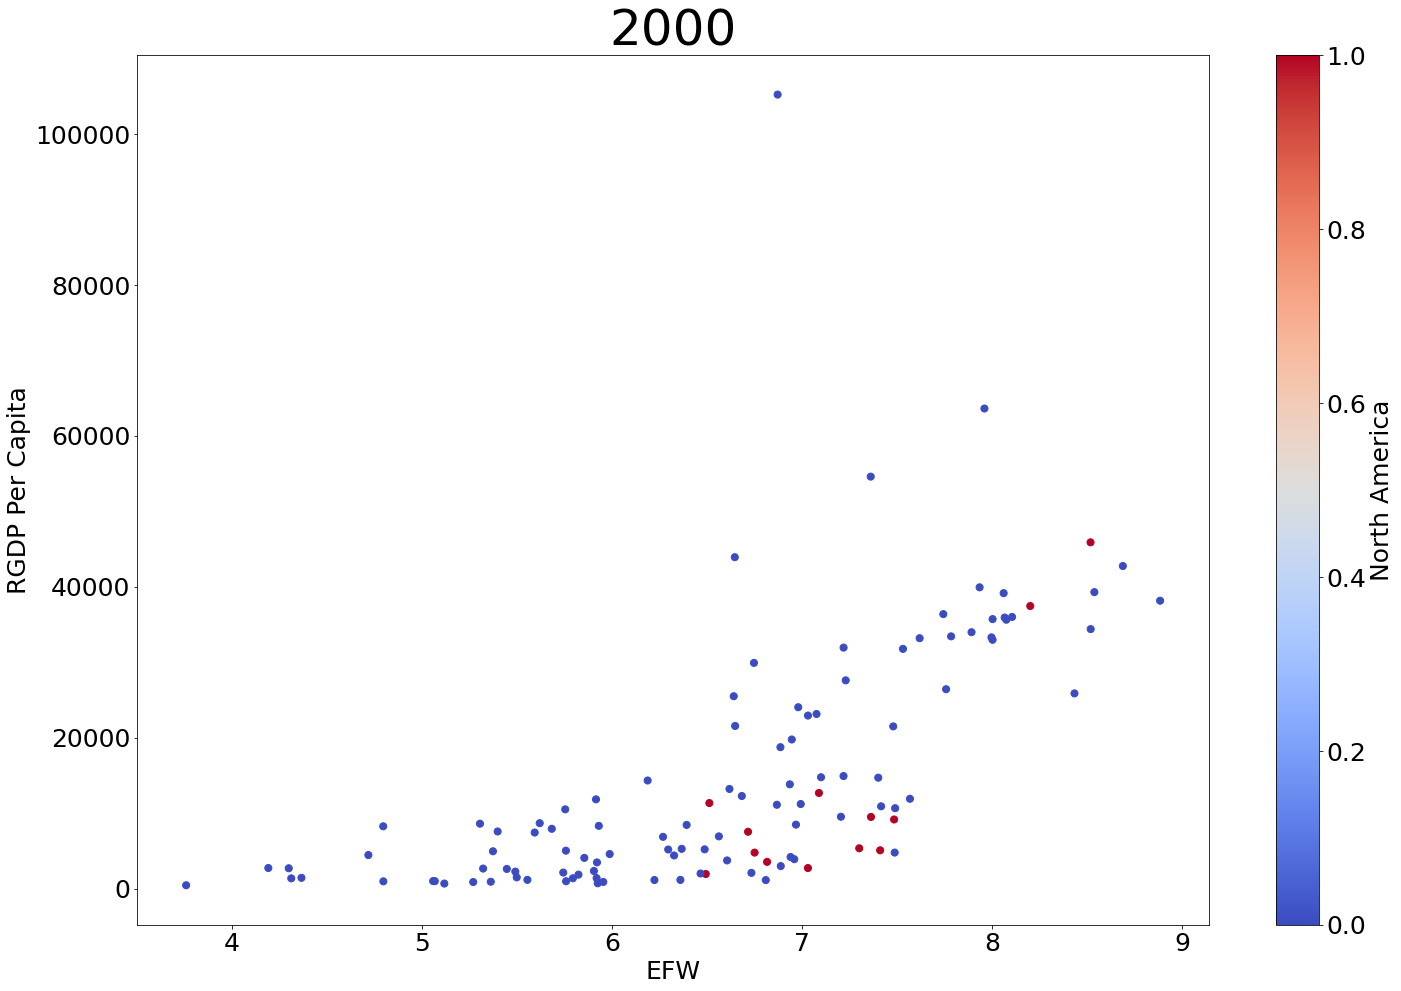

In [19]:
year = 2000
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", c = "North America",
                      cmap = "coolwarm", ax = ax, s = 50)
ax.set_title(str(year), fontsize = 50)

In [136]:
# Qutantile ranking: This could be done by dividing data into quantiles or using divisions.

In [20]:
#quantile.py
import pandas as pd
import numpy as np

def create_quantile(n, data, year, quantile_var, quantile_name):
    # index that identifies countries for a given year
    year_index = data.index.get_level_values("Year") == year
    # holds the dividing criteria from quantile n to quantile n+1
    quantile_values_dict = {i:data[year_index][quantile_var]\
                           .quantile(i/n) for i in range(1, n + 1)}
    # for index in --> for country in 
    for index in data[year_index].index:
        # take the value of the country for the variable 
        # that we are building the quantile for
        val = data.loc[index][quantile_var]
        for i in range(1, n + 1):
            # if the value is less than the highest in the quantile,
            # save quantile as i
            if val <= quantile_values_dict[i]:
                data.loc[index, [quantile_name]] = int((n + 1) - i)
                break
            else:
                continue

# choose numbers of divisions
n = 5
# import data
#data = pd.read_csv("fraserDataWithRGDPPC.csv", 
#                   index_col = ["ISO_Code", "Year"],   
#                   parse_dates = True)  
# create column identifyiong n-tile rank
quantile_var = "RGDP Per Capita"
quantile_name = quantile_var + " " + str(n) +"-tile"
data[quantile_name] = np.nan

years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

 it is useful to use color to indicate discrete variables and  color will represent the quantile. We can dividde the color bar into n divisions and place the number of quantile at the top of each color division.

Text(0.5, 1.0, 'Year: 2000')

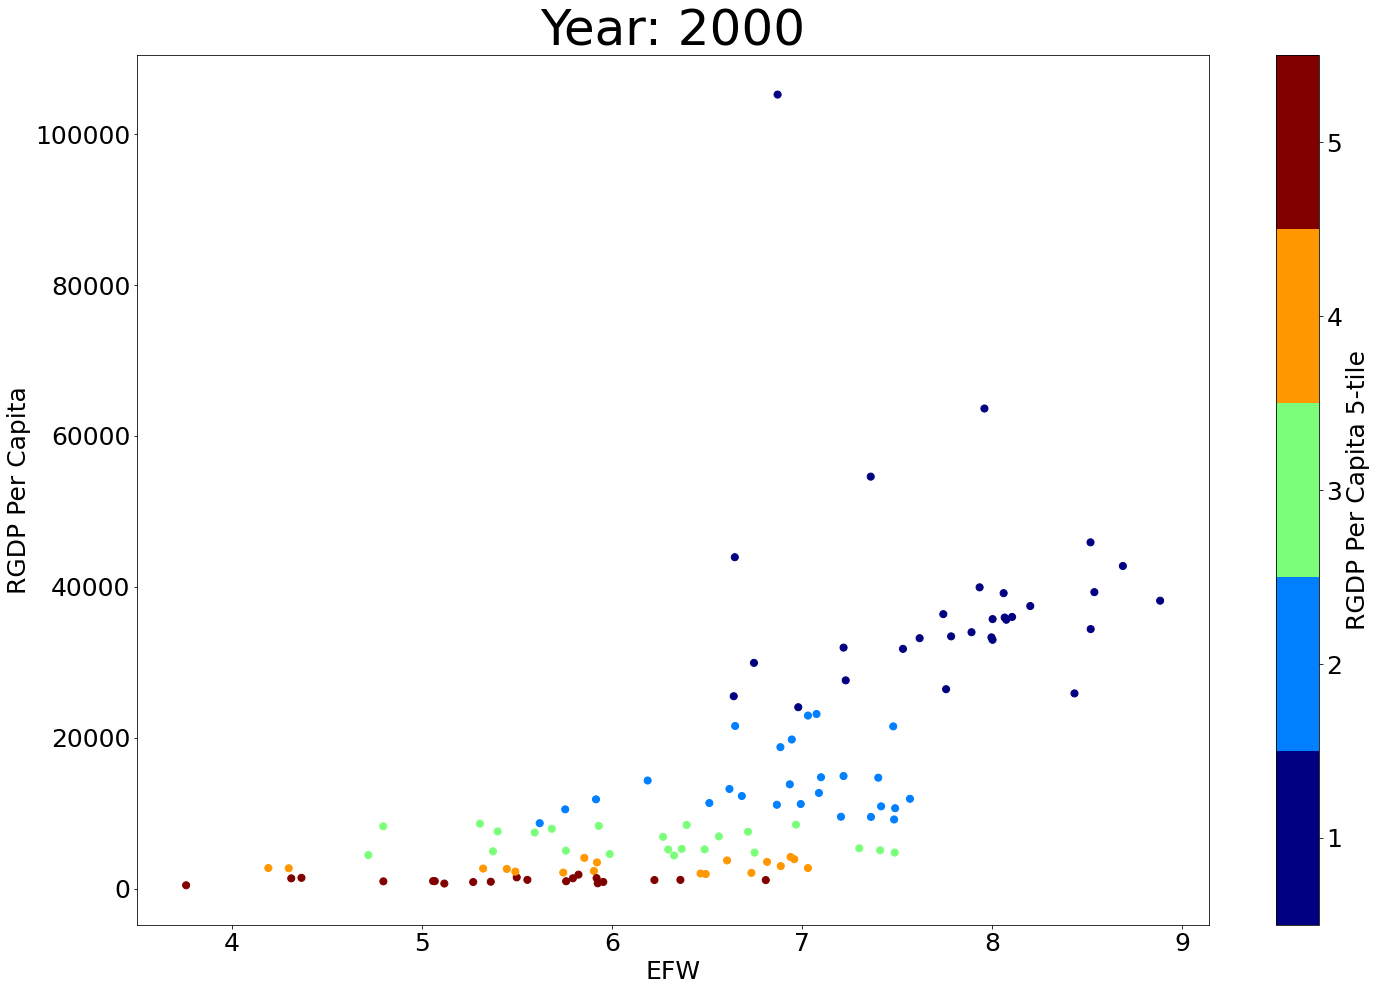

In [21]:

from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2000
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# set vmin to 0.5 to slight shift scale, otherwise quintile 
# measures will be on border between colors and 1 and 2 will be 
# indicated in lightblue
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = cmap, norm = norm,  ax = ax, s = 50,
                      legend = False, vmin = 0.5, vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 50)

In [137]:
# USE the log variables or difference log values to manage the autocorrelation issues of times series data. 
# USe mutiple index, we have to point out which specific index we plan to do, to acheive this goal, we can use the cocommand of group by(Level)

In [153]:
#logAndDifferenceData.py
import datetime

# dtypes = ['str', 'float']

data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDPPerCapita"] = data[
    data.index.get_level_values("Year") >= datetime.datetime(1999, 1, 1)]\
    .groupby(level="ISO_Code")["RGDPPerCapita"].shift(-1)
data

# headers = ['col1', 'col2', 'col3', 'col4']
# pd.read_csv(file, sep='\t', header=None, names=headers, dtype=dtypes)

Countries       EFW  1SizeofGovernment  \
ISO_Code Year                                                
ALB      2017-01-01   Albania  7.673511           7.528167   
         2016-01-01   Albania  7.637742           7.875862   
         2015-01-01   Albania  7.639666           7.904257   
         2014-01-01   Albania  7.586769           7.882037   
         2013-01-01   Albania  7.389525           7.807904   
...                       ...       ...                ...   
ZWE      1990-01-01  Zimbabwe  4.516140           5.108843   
         1985-01-01  Zimbabwe  4.226841           5.026250   
         1980-01-01  Zimbabwe  4.054740           6.322625   
         1975-01-01  Zimbabwe       NaN                NaN   
         1970-01-01  Zimbabwe       NaN                NaN   

                     2Legal System&Property Rights  3Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                       5.064907      9.648271   
         2016-01-01                       5.071814      9.553657   
         2015-01-01                       5.003489      9.585625   
         2014-01-01                       4.666740      9.629320   
         2013-01-01                       4.543782      9.690942   
...                                            ...           ...   
ZWE      1990-01-01                       3.439437      5.664840   
         1985-01-01                       2.633492      6.305850   
         1980-01-01                       1.379602      6.343342   
         1975-01-01                            NaN           NaN   
         1970-01-01                            NaN           NaN   

                     4Freedomtotradeinternationally  5Regulation  \
ISO_Code Year                                                      
ALB      2017-01-01                        8.343863     7.782349   
         2016-01-01                        8.214900     7.472476   
         2015-01-01                        8.109118     7.595838   
         2014-01-01                        8.208630     7.547119   
         2013-01-01                        7.705771     7.199224   
...                                             ...          ...   
ZWE      1990-01-01                        4.689623     3.953668   
         1985-01-01                        3.161743     4.207229   
         1980-01-01                        3.277015     3.280637   
         1975-01-01                             NaN          NaN   
         1970-01-01                             NaN          NaN   

                     RGDPPerCapita  
ISO_Code Year                       
ALB      2017-01-01        11285.0  
         2016-01-01        10947.0  
         2015-01-01        10703.0  
         2014-01-01        10138.0  
         2013-01-01        10344.0  
...                            ...  
ZWE      1990-01-01            NaN  
         1985-01-01            NaN  
         1980-01-01            NaN  
         1975-01-01            NaN  
         1970-01-01            NaN  

[3888 rows x 8 columns]

In [154]:
data.dtypes

Countries                          object
EFW                               float64
1SizeofGovernment                 float64
2Legal System&Property Rights     float64
3Sound Money                      float64
4Freedomtotradeinternationally    float64
5Regulation                       float64
RGDPPerCapita                     float64
dtype: object

In [155]:
data["1SizeofGovernment"].diff()
data["RGDPPerCapita"].diff
data["2Legal System&Property Rights"].diff
data["3Sound Money"].diff
data["4Freedomtotradeinternationally"].diff
data["5Regulation"].diff

<bound method Series.diff of ISO_Code  Year      
ALB       2017-01-01    7.782349
          2016-01-01    7.472476
          2015-01-01    7.595838
          2014-01-01    7.547119
          2013-01-01    7.199224
                          ...   
ZWE       1990-01-01    3.953668
          1985-01-01    4.207229
          1980-01-01    3.280637
          1975-01-01         NaN
          1970-01-01         NaN
Name: 5Regulation, Length: 3888, dtype: float64>

In [156]:
# next, log the data
for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])    
data

Countries       EFW  1SizeofGovernment  \
ISO_Code Year                                                
ALB      2017-01-01   Albania  7.673511           7.528167   
         2016-01-01   Albania  7.637742           7.875862   
         2015-01-01   Albania  7.639666           7.904257   
         2014-01-01   Albania  7.586769           7.882037   
         2013-01-01   Albania  7.389525           7.807904   
...                       ...       ...                ...   
ZWE      1990-01-01  Zimbabwe  4.516140           5.108843   
         1985-01-01  Zimbabwe  4.226841           5.026250   
         1980-01-01  Zimbabwe  4.054740           6.322625   
         1975-01-01  Zimbabwe       NaN                NaN   
         1970-01-01  Zimbabwe       NaN                NaN   

                     2Legal System&Property Rights  3Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                       5.064907      9.648271   
         2016-01-01                       5.071814      9.553657   
         2015-01-01                       5.003489      9.585625   
         2014-01-01                       4.666740      9.629320   
         2013-01-01                       4.543782      9.690942   
...                                            ...           ...   
ZWE      1990-01-01                       3.439437      5.664840   
         1985-01-01                       2.633492      6.305850   
         1980-01-01                       1.379602      6.343342   
         1975-01-01                            NaN           NaN   
         1970-01-01                            NaN           NaN   

                     4Freedomtotradeinternationally  5Regulation  \
ISO_Code Year                                                      
ALB      2017-01-01                        8.343863     7.782349   
         2016-01-01                        8.214900     7.472476   
         2015-01-01                        8.109118     7.595838   
         2014-01-01                        8.208630     7.547119   
         2013-01-01                        7.705771     7.199224   
...                                             ...          ...   
ZWE      1990-01-01                        4.689623     3.953668   
         1985-01-01                        3.161743     4.207229   
         1980-01-01                        3.277015     3.280637   
         1975-01-01                             NaN          NaN   
         1970-01-01                             NaN          NaN   

                     RGDPPerCapita  Log RGDPPerCapita  
ISO_Code Year                                          
ALB      2017-01-01        11285.0           9.331230  
         2016-01-01        10947.0           9.300821  
         2015-01-01        10703.0           9.278279  
         2014-01-01        10138.0           9.224046  
         2013-01-01        10344.0           9.244162  
...                            ...                ...  
ZWE      1990-01-01            NaN                NaN  
         1985-01-01            NaN                NaN  
         1980-01-01            NaN                NaN  
         1975-01-01            NaN                NaN  
         1970-01-01            NaN                NaN  

[3888 rows x 9 columns]

In [160]:
# data = pd.read_csv("fraserDataWithRGDPPC.csv",index_col = [0, 2], parse_dates = True, dtype={key:float for key in df_keys})

In [158]:
# grouped = data1.groupby('Year')
# grouped = data1.groupby(['Year', 'ISO_Code'])   
#data2 = data1.set_index(['Year', 'ISO_Code'])
#grouped = data2.groupby(level=data2.index.names.difference(['ISO_Code']))
# grouped.sum()
# grouped

In [159]:
diff_index = data.groupby(level=0).diff(-1).dropna().index
data_dict = {}
data_dict["Data"] = data
data_dict["Diff Data"] = data.copy().loc[diff_index]
for key in data:
    if "GDP" in key:
        data_dict["Diff Data"][key] = data[key].groupby(
            level=0).diff(-1)
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [130]:
data_dict["Diff Data"].loc["USA"]

KeyError: 'Diff Data'